### Rolling Regression

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start = '1-1-1926')[0]
industries = pdr.get_data_famafrench('10_Industry_Portfolios', start = '1-1-1926')[0]

In [11]:
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors['Mkt-RF'])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params

In [12]:
params.head()

,const,Mkt-RF
Date,,
1926-07,NaN,NaN
1926-08,NaN,NaN
1926-09,NaN,NaN
1926-10,NaN,NaN
1926-11,NaN,NaN


In [13]:
params.tail()

,const,Mkt-RF
Date,,
2023-11,0.587508,1.090195
2023-12,0.528675,1.095787
2024-01,0.558017,1.098249
2024-02,0.532879,1.095715
2024-03,0.476365,1.094147


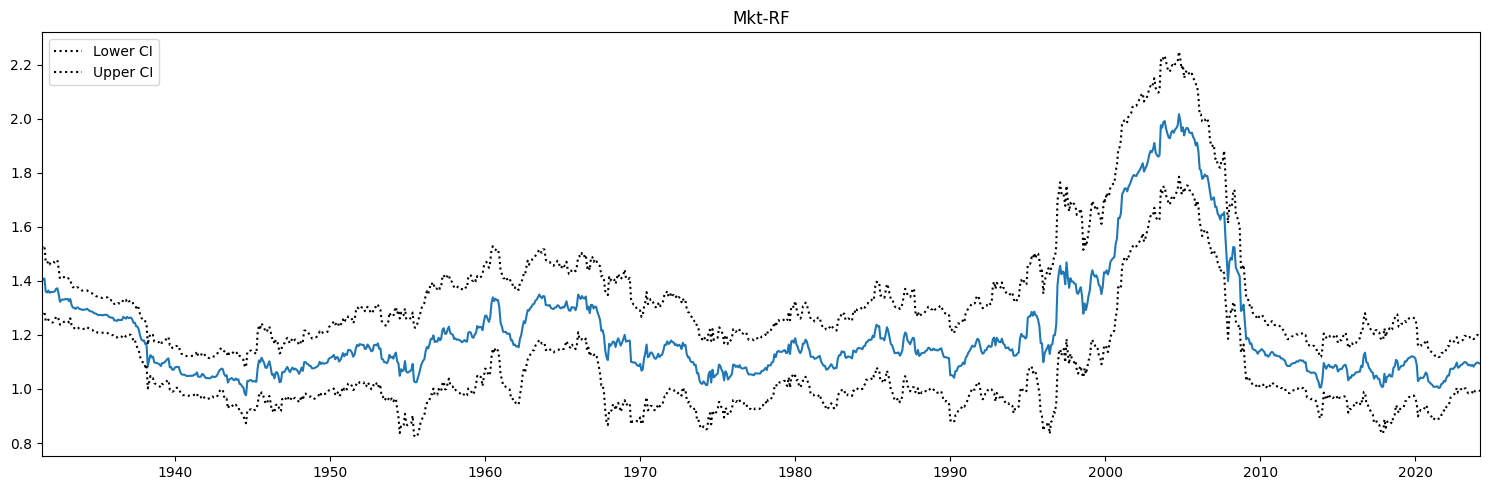

In [16]:
rres.plot_recursive_coefficient(variables=['Mkt-RF'], figsize=(15,5));

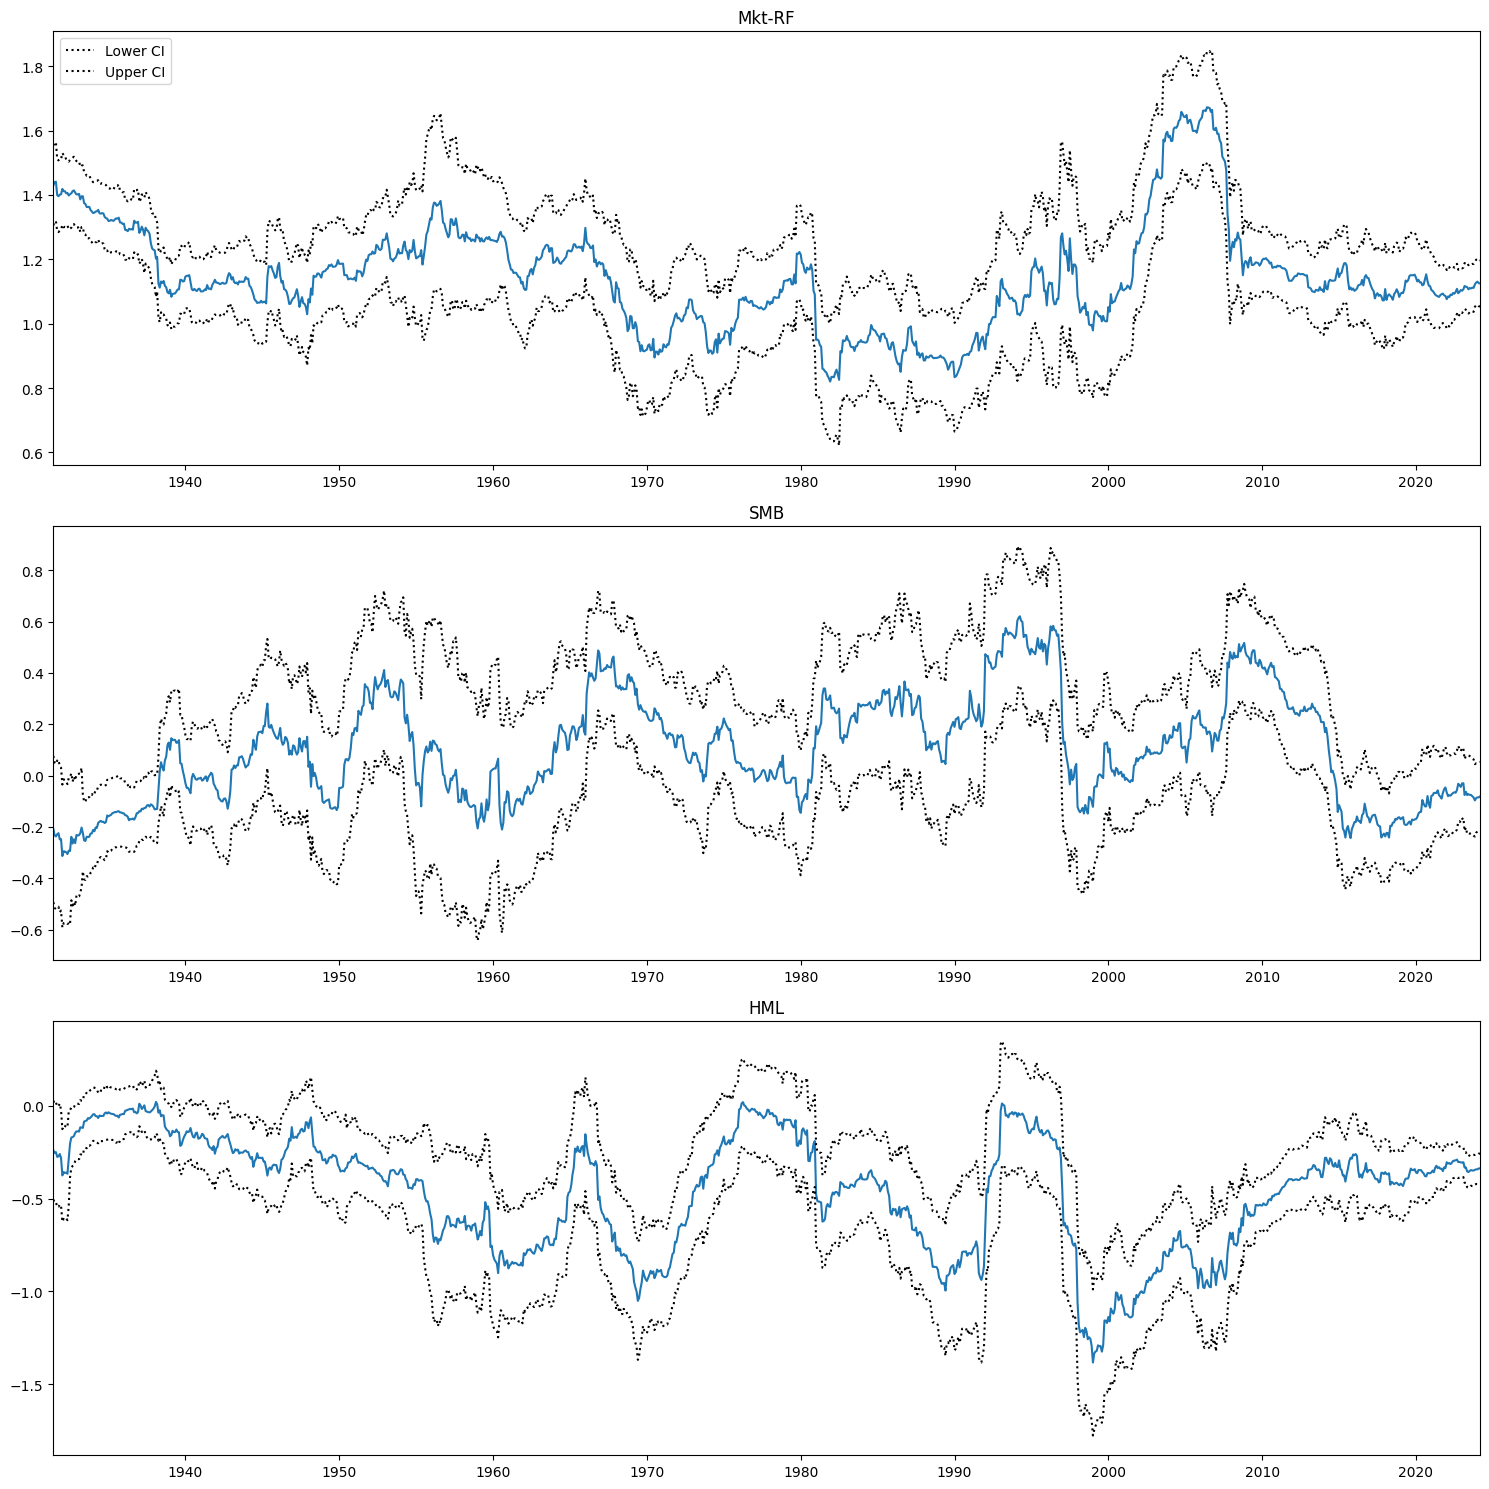

In [17]:
exog_vars = ['Mkt-RF', 'SMB', 'HML']
exog = sm.add_constant(factors[exog_vars])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
rres.plot_recursive_coefficient(variables=exog_vars, figsize=(15,15));